# Counting Bloom Filters
### Vinicius Enari
## CS110 - Spring 2019
## 1. Overview
A Bloom Filter is a data structure that is used to check whether an element is definitely not in a set, or if there is a probability of that element to be in the set. Its main advantage is that it is extremely space and time efficient.
<br>
An empty bloom filter is an array of zeros. As we fill the bloom filter, we change the values from zero to one. We do not store the elements in the bloom filter. It supports two kinds of operation, insertion and contains. We cannot remove an element from a bloom filter because we might remove another element as well, in the case the hash of two elements point to the same index, if we change the value at that index to 0 to remove one element, we are also removing the other element.
<br>
A counting bloom filter is different from the regular bloom filter because instead of just setting the value equal to 1, it adds 1 to the value when there is a collision. While the regular bloom filter is an array of 0s and 1s, the counting bloom filter can have 0s and any positive integer. Thus, we can remove an element from a counting bloom filter by just subtracting 1 from each index given by the hash functions.
### Insertion
When we add an element to the bloom filter, we check its value for each of the hash functions, then we add 1 to the value at the position given by each hash function. If there is a collision, the value at that index will be greater than one. In a regular bloom filter, collisions would be ignored and the element would remain one.
### Contains
We can check whether an element is in the bloom filter or not by checking if there is an zero in one of the positions given by the hash functions. If there is an zero, it is certain that the element was not added to the bloom filter. If all positions contain a number different than zero, we cannot be sure if the element is in the bloom filter because there might have occured a collision.
### Deletion
We delete an element from a Counting Bloom Filter by subtracting one from each of the values at the positions given by each hash function. Deletion is not allowed in a regular bloom filter because it is very likely to remove many different elements by removing just a single item.
### Efficiency
Compared to other data structures that utilize hashing, bloom filters are very efficient regarding space and time complexity. Because it only contains integers, it does not require much memory to save the values in the array. Also, because it does not perfectly solve collisions, insertion and contains will have time complexity O(1), cause we only need to run the hash function to find a position, without iterating for empty slots like in open addressing or going through a chained list like in chaining.
### Variables
There are four variables that change according to each bloom filter, they are: <br>
$m$ = Size of the Bloom Filter <br>
$n$ = Number of elements you want to add <br>
$p$ = False Positive Rate <br>
$k$ = Number of hash functions <br>
Given a desired false positive rate $p$, and the number of elements we want to add in the bloom filter $n$, the size of the bloom filter $m$ should be:
$$m = -\frac{n\ln p}{(\ln2)^{2}}$$
The optimal number of hash functions necessary to minimize the false positive rate is:
$$ k = \frac{m}{n} \ln2 = -\log_{2}{p} $$
### Applications
Because what Bloom Filters do best is to check whether an element is not in the set, one application could be to find whether someone has not arrived at an event. Given a bloom filter that represents the people who have already arrived with 1s in their respective hashes index, you can check whether a person has not arrived, or if the person possibly has arrived. This would be better when the number of people is very large, otherwise the main advantage of bloom filters, that is their efficiency, would not be explored.
<br>
Another application could be to find if a word is from a certain language. If you are trying to discover from which language a certain word is. You could have a list of all words from different languages, than you create bloom filters that contain all words from each language. Then, you utilize the contains operation to check which languages the words definitely does not belong to, reducing the number of possible languages that the words could be from.

## 2. Implementation

In [397]:
import random
import string
import math

#Creates an empty bloom filter given the number of elements to add (n)
# and the false positive rate fpr.
def createEmptyBloomFilter(n, fpr):
    #find optimal size
    size = int(-(n*math.log(fpr))//(math.log(2)**2))
    #if size is less than 1, set it to 1
    if size < 1:
        size = 1
    #returns an array of zero of optimal size
    return [0 for zero in range(size)]


#Inserts and element in the bloom filter
def insertBloomFilter(bloomFilter, word, hashFunctions):
    N = len(bloomFilter)
    
    #find the index for each hash function and changes it value to 1
    for function in hashFunctions:
        index = function(word) % N
        bloomFilter[index] += 1
    return bloomFilter
    
    
#Checks whether an element is possibly in the bloom filter or not
def containsBloomFilter(bloomFilter, word, hashFunctions):
    N = len(bloomFilter)
    
    #find the index of the element for each hash function
    for function in hashFunctions:
        index = function(word) % N
        
        #if any index is zero, than the element is not in the set
        if bloomFilter[index] == 0:
            return False
    
    #if none index is zero, than the element is possibly in the set
    return 'Maybe'


def deleteBloomFilter(bloomFilter, word, hashFunctions):
    N = len(bloomFilter)
    
    #finds index for each hash function and subtract 1
    for function in hashFunctions:
        index = function(word) % N
        #if one the values is zero, than the element was not added,
        #thus it cannot be removed
        if bloomFilter[index] == 0:
            raise Exception('Cannot remove element that was not added to Bloom Filter')
        else:
            bloomFilter[index] -= 1


#creates a hash function given a value utilizing another hash function as base
def createHashFunction(value):
    #I utilized this hash function as a base for all my generated hash functions because
    #it was the hash function that most avoided collisions from the ones seen in class
    #and words with the same letter had different values ('abc' !=  'cba')
    def hashFunction(word):
        ans = 0
        for chr in word:
            #Each hash function will have a different value added len(word) times.
            ans = (ans * 128 + ord(chr)) + value
        return ans
    return hashFunction


#Creates multiple hash functions given the desired false positive rate
def hashFunctionsGenerator(fpr):
    #find the optimal number of hash functions given the false positive rate
    numberFunctions = int(- math.log(fpr,2))
    
    #When fpr > 0.5, numberFunctions = 0, so I need to set the number of functions to 1.
    if numberFunctions < 1:
        numberFunctions = 1
    
    functions = []
    #creates a different hash function and append it to the list
    for i in range(0,numberFunctions):
        hashFunction = createHashFunction(i)
        functions.append(hashFunction)
    #returns a list of different hash functions
    return functions
    

#Auxiliary function that generates random words.
def randomWord(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

In [212]:
#Testing whether the different hash functions generated are producing relative different results
functions = hashFunctionsGenerator(0.00000001)
hashes = []
hashes1 = []
for i in range(len(functions)):
    hashes.append(functions[i]('abc') % 100)
    hashes1.append(functions[i]('bca') % 100)
print(hashes)
print(hashes1)

[91, 4, 17, 30, 43, 56, 69, 82, 95, 8, 21, 34, 47, 60, 73, 86, 99, 12, 25, 38, 51, 64, 77, 90, 3, 16]
[1, 14, 27, 40, 53, 66, 79, 92, 5, 18, 31, 44, 57, 70, 83, 96, 9, 22, 35, 48, 61, 74, 87, 0, 13, 26]


In [143]:
#Testing whether it is creating a bloom filter
bloomFilter = createEmptyBloomFilter(10,0.1)
hashFunctions = hashFunctionsGenerator(0.1)
for i in range(10):
    insertBloomFilter(bloomFilter, randomWord(10), hashFunctions)
print(bloomFilter)

#Testing exception when trying to remove element not added to bloom filter
deleteBloomFilter(bloomFilter, 'abc', hashFunctions)

[1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]


Exception: Cannot remove element that was not added to Bloom Filter

## 3. Analysis of Memory and Time Scale

### a) Memory Size as a function of the False Positive Rate.
#### Theoretical Analysis:
The memory size is related to the length of the array, so I will consider the lenght of the bloom filter as the memory size. As mentioned before, the size of the bloom filter $m$ is given by:
$$m = -\frac{n\ln p}{(\ln2)^{2}}$$
The memory is going to increase as a function of $-\ln p$, for $p$ equal to false positive rate $\rightarrow O(\ln p)$

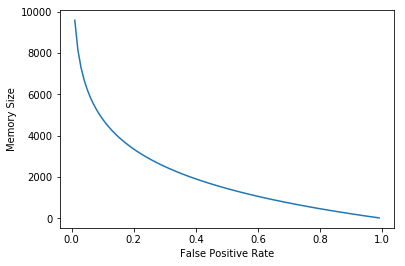

In [164]:
#Empirical Analysis:
import matplotlib.pyplot as plt

#Creates 100 false positive rates from 0 to 1
falsePositiveRates = [n/100 for n in range(1,100)]
memorySize = []
#Number of elements that want to add int the array equal to 1000
n = 1000

#Finds the optimal array size given the false positive rate
for fpr in falsePositiveRates:
    bloomFilter = createEmptyBloomFilter(n, fpr)
    memorySize.append(len(bloomFilter))
    
plt.plot(falsePositiveRates,memorySize)
plt.xlabel('False Positive Rate')
plt.ylabel('Memory Size')
plt.show()

#### Empirical Analysis
As shown by the graph above, the larger the false positive rate, the less memory used. This can be explained by the fact that the more we allow false positives to happen, the more collisions we are allowing to happend, thus the size of the array will be smaller. A very low false positive rate will require a very large array to avoid collisions.

### b) Memory Size as a function of the Number of Items stored.
#### Theoretical Analysis
Continuing using the lenght of the array as memory size and utilizing the same formula:
$$m = -\frac{n\ln p}{(\ln2)^{2}}$$
Memory size $m$ is related to the number of items stored $n$ linearly $\rightarrow$ O(n)

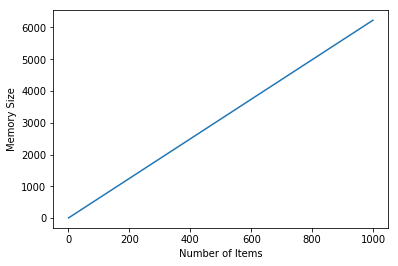

In [166]:
#Empirical Analysis:

memorySize = []
#list of number of items to be stored from 1 to 1000
numberItems = [n for n in range(1,1000)]
#fixed false positive rate at 0.05
falsePositiveRate = 0.05

#find the size for each 
for n in numberItems:
    bloomFilter = createEmptyBloomFilter(n, falsePositiveRate)
    memorySize.append(len(bloomFilter))
    
plt.plot(numberItems, memorySize)
plt.xlabel('Number of Items')
plt.ylabel('Memory Size')
plt.show()

#### Empirical Analysis
The empirical analysis of the relationship between memory size and number of items shows that it grows linearly as expected. Giving a fixed positive rate, the memory size has to increase as the number of items to be store increase, so that the false positive rate continues the same.

### c) Access Time as a function of the False Positive Rate.
#### Theoretical Analysis
The access time will depend on the of the number of hash functions. When you try to find a certain element, you will check the index for each hash function. So, the more hash functions you have, the longer the access time. The number of hash functions $k$ is given by:
$$ k = \frac{m}{n} \ln2 = -\log_{2}{p} $$
So, if the number of hash functions is not constant, the access time is $O(k) = O(\log p)$
<br>
If the number of hash functions is constant the access time is $O(1)$

In [256]:
import time

#Create list of positive rates from 0.01 to 0.99
falsePositiveRates = [n/100 for n in range(1,100)]
accessTimes = []

#fix number of items to be stored as 10000
n = 10000

#for each false positive rate
for fpr in falsePositiveRates:
    
    #Creates a bloom filter for the false positive rate and the number of items to be stored
    bloomFilter = createEmptyBloomFilter(n, fpr)
    #generate random words to be stored
    words = [randomWord(10) for i in range(n)]
    #generate hash functions using the given false positive rate
    hashFunctions = hashFunctionsGenerator(fpr)
    totalTime = 0
    
    #insert each word in the bloom filter
    for word in words:
        insertBloomFilter(bloomFilter, word, hashFunctions)
        
    #search for each word a measure time
    start = time.time()
    for word in words:
        containsBloomFilter(bloomFilter, word, hashFunctions)
    end = time.time()
    totalTime = (end-start)
    
    #after searching for all words append time to access times list
    accessTimes.append(totalTime)

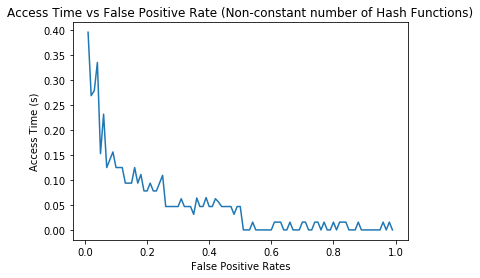

In [257]:
plt.plot(falsePositiveRates, accessTimes)
plt.xlabel('False Positive Rates')
plt.ylabel('Access Time (s)')
plt.title('Access Time vs False Positive Rate (Non-constant number of Hash Functions)')
plt.show()

In [249]:
#This cell contains the same thing from above, except that the number of hashfunctions
#are not going to be generated based on each false positive rate
falsePositiveRates = [n/100 for n in range(1,100)]
accessTimes = []

n = 10000

for fpr in falsePositiveRates:
    
    bloomFilter = createEmptyBloomFilter(n, fpr)
    words = [randomWord(10) for i in range(n)]
    
    #set false positive rate as 0.1 to generate always the same number of hash functions
    hashFunctions = hashFunctionsGenerator(0.1)
    totalTime = 0
    
    for word in words:
        insertBloomFilter(bloomFilter, word, hashFunctions)
    start = time.time()
    for word in words:
        containsBloomFilter(bloomFilter, word, hashFunctions)
    end = time.time()
    totalTime = (end-start)
    accessTimes.append(totalTime)

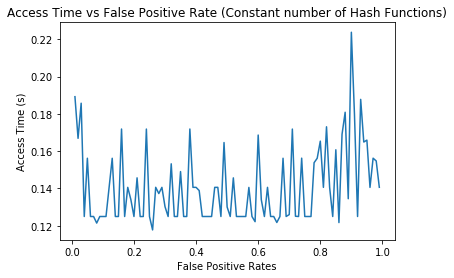

In [250]:
plt.plot(falsePositiveRates, accessTimes)
plt.xlabel('False Positive Rates')
plt.ylabel('Access Time (s)')
plt.title('Access Time vs False Positive Rate (Constant number of Hash Functions)')
plt.show()

#### Empirical Analysis
As shown by the first graph, when we utilize a non-constant number of hash functions, which are in function of the false positive rate, the access times relates to the false positive rate in $O(\log p)$.
<br>
Graph 2, shows that when the number of hash functions is constant, this relationship does not happen anymore, it should be constant, but the measured access times are being affected by other variables that are causing a random behavior in the graph.

### d) Access Time as a function of the Number of Items Stored.
#### Theoretical Analysis
As mentioned before, the access time depend on the number of hash functions. The number of hash functions $k$ is given by:
$$ k = \frac{m}{n} \ln2 = -\log_{2}{p} $$
The number of hash functions does relate with the number of items store $n$, because of $m$ which is:
$$m = -\frac{n\ln p}{(\ln2)^{2}}$$
The $n$ factor cancels out, thus the number of hash functions varies only based on the false positive rate $p$. So the relation ship between access time and number of items store is constants $O(1)$

In [378]:
#list of the number of items to be stored from 1 to 999
numberItemStored = [n for n in range(1,1000)]
accessTimes = []
#fixed false positive rate at 0.5
falsePositiveRate = 0.5

#for each number of items to be stored
for n in numberItemStored:
    #creates bloom filter
    bloomFilter = createEmptyBloomFilter(n, falsePositiveRate)
    #generate random words equal to the number of items to be stored
    words = [randomWord(10) for i in range(n)]
    #generate hash functions based on the false positive rate 0.5
    hashFunctions = hashFunctionsGenerator(fpr)
    
    totalTime = 0
    
    #insert words
    for word in words:
        insertBloomFilter(bloomFilter, word, hashFunctions)
        
    #search for words and count time
    start = time.time()
    for word in words:
        containsBloomFilter(bloomFilter, word, hashFunctions)
    end = time.time()
    totalTime = (end-start)
    
    #append time to access times.
    accessTimes.append(totalTime)

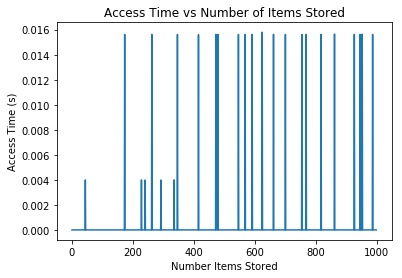

In [379]:
plt.plot(numberItemStored, accessTimes)
plt.xlabel('Number Items Stored')
plt.ylabel('Access Time (s)')
plt.title('Access Time vs Number of Items Stored')
plt.show()

#### Empirical Analysis
The measured results show that the number of items stored does not a relation with the access time. There are some outliers in the graph that are being caused by other factors.

### 4. Implementation's False Positive Rate vs. Expected False Positive Rate

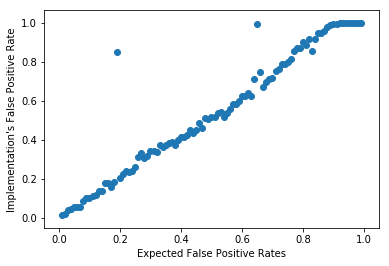

In [386]:
#creates list of false positive rates from 0.01 to 0.99
falsePositiveRates = [n/100 for n in range(1,100)]
implementationFalsePositiveRates = []

#fix number of words at 1000
numberWords = 1000

#for each false positive rate
for fpr in falsePositiveRates:
    #creates a bloom filter
    bloomFilter = createEmptyBloomFilter(numberWords, fpr)
    #generate hash functions
    hashFunctions = hashFunctionsGenerator(fpr)
    
    #creates 1000 words that will be in the bloom filter
    #and 1000 words that won't be in the bloom filter
    words = [randomWord(10) for i in range(1000)]
    nonStoredWords = [randomWord(9) for i in range(1000)]
    
    #insert words in bloom filters
    for word in words:
        insertBloomFilter(bloomFilter, word, hashFunctions)

    #search for words that shouldn't be in the bloom filter
    #if it finds, increase the number of false positives by 1
    falsePositives = 0
    for word in nonStoredWords:
        if containsBloomFilter(bloomFilter, word, hashFunctions) != False:
            falsePositives += 1
    
    #The measured false positive rate is the number of false positives divided by the total
    #of words, which is 1000
    measuredFalsePositiveRate = falsePositives / 1000
    
    #append measured false positive rate to the list of measures
    implementationFalsePositiveRates.append(measuredFalsePositiveRate)
    
plt.scatter(falsePositiveRates, implementationFalsePositiveRates)
plt.xlabel('Expected False Positive Rates')
plt.ylabel('Implementation\'s False Positive Rate')
plt.show()

The implementation's false positive rate seems to match with the expected false positive rate, there are only few outliers, but overall they are very correlated.

### 5. Corner Cases that one might find in CBFs
One of the corner cases of CBFs is when the number of elements you want to store in the bloom filter is low, and the false positive rate is close to 1. In this case, the array is going to have a very small size. In the example below, the size is 1, but it would have been 0, if it wasn't for one exception that I included when creating the bloom filter so that the minimum size is always 1.

In [400]:
fpr = 0.99
bloomFilter = createEmptyBloomFilter(10,0.99)
print(bloomFilter)

[0]


Another corner case happens when the false positive rate is very high. When we try to generate hash functions, we utilize the false positive rate as an parameter to decide the most optimal number of hash functions. If the false positive rate is fixed at a high value, the code can generate zero hash functions. So, I set the minimum number of hash functions equal to zero to solve this case.

### HCs applied

$\textbf{#algorithms:}$ Created algorithms for different operations of Bloom Filters
<br>
$\textbf{#dataviz:}$ Created visualisations that illustrate the behavior of different variables in bloom filters as other variables scale

### References
Bloom filter. (2019, February 04). Retrieved March 9, 2019, from https://en.wikipedia.org/wiki/Bloom_filter